# Example 3: Markov Stability applied to directed graph

In [1]:
import networkx as nx
import scipy.sparse as sp

from pygenstability import run, plotting, constructors

In [2]:
# creating directed partitioned graph

nx_graph = nx.planted_partition_graph(4, 20, 0.3, 0.01, seed=42, directed=True)
adjacency = nx.to_numpy_array(nx_graph)

In [3]:
# defining the constructor externally

directed_constructor = constructors.load_constructor('directed', sp.csgraph.csgraph_from_dense(adjacency), alpha=0.85)

In [4]:
# scan markov scale for communities

all_results = run(adjacency, min_scale=-1, max_scale = 1, n_scale=90, constructor=directed_constructor)

Your graph is directed!
100%|██████████| 90/90 [00:00<00:00, 121.62it/s]


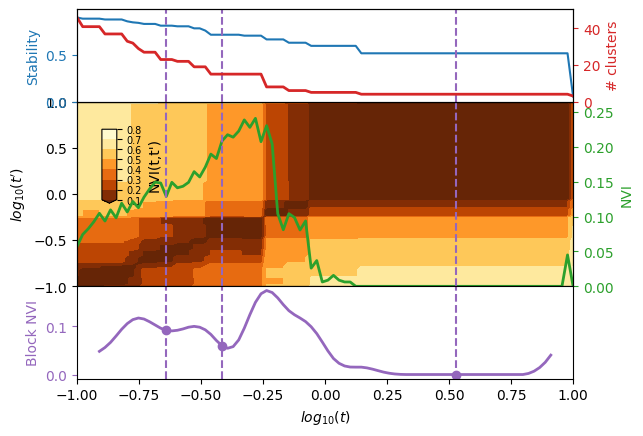

In [5]:
_ = plotting.plot_scan(all_results)

In [6]:
pos = nx.spring_layout(nx_graph, weight=None, scale=1)
for u in nx_graph:
    nx_graph.nodes[u]["pos"] = pos[u]


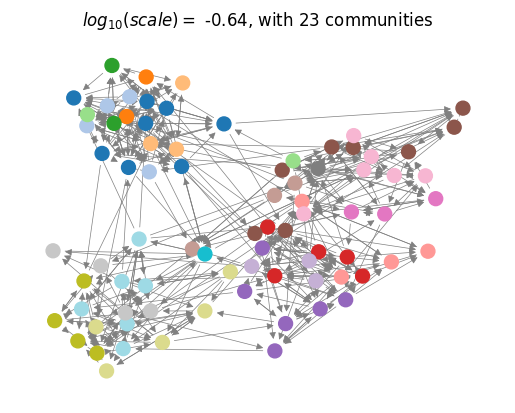

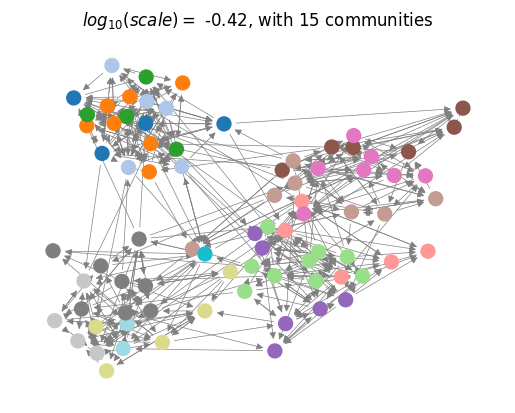

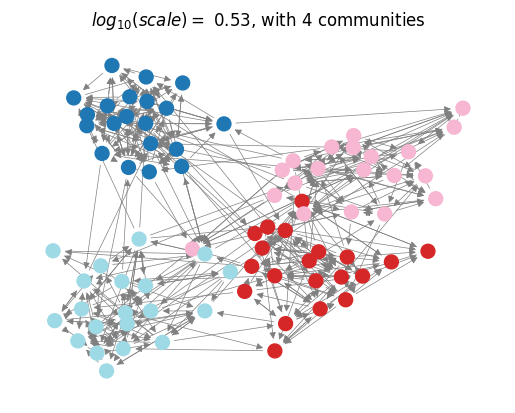

In [7]:
# plot optimal partitions
plotting.plot_optimal_partitions(nx_graph,all_results)